NOTE: Since we are using a mount to access the data we need to make sure that the directory Hep_300_Mount actually links to the symmetry server. The way to do this is to move to the directory Hep_300_Mount on the local machine in terminal and then run

<br/>

<div>"sshfs lpolson@symmetry.uvic.ca:/hep300/ Documents/Mounts/Hep_300_Mount"</div>

# Open File and Store in DataFrame

In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Define sampling rate

In [2]:
SR = 25 #in nanoseconds

For uproot see https://uproot.readthedocs.io/en/latest/ for documentation or https://github.com/scikit-hep/uproot for github page.

In [3]:
FILE_PATH = '/Users/lukepolson/Documents/Mounts/Hep_300_Mount/data-shared/LArPulse/ntuples/pulse_347848/'

Use UPROOT to open a single ROOT file.

In [4]:
file = uproot.open(FILE_PATH+'ntuple_347848_9980.root')

In [12]:
df = pd.read_pickle("/Users/lukepolson/Documents/Mounts/Hep_300_Mount/data-shared/LArPulse/DataFrames/pulse_347848/DF1.pkl")

In [13]:
df

,RunNumber,LBNumber,EventNumber,BCID,LArError,ncells,ECell,TCell,EtaCell,PhiCell,LayerCell,ProvCell,QuaCell,GainCell,HwidCell,ADC
0,347848,159,3049231,1,0,4,6885.854492,-1.100362,-1.549730,-2.633353,6,8613,103,0,175527,"[-3, 0, 4, -4, 0, 265, 460, 329, 148, 77, 20, ..."
0,347848,159,3049231,1,0,4,2565.138184,-0.233291,-0.912313,0.602748,2,8613,140,0,26323,"[3, 3, -2, 3, 5, 131, 174, 148, 100, 53, 12, -..."
0,347848,159,3049231,1,0,4,5131.000000,0.293847,-1.658680,-2.701142,9,8613,20,1,176925,"[5, -1, -1, 2, 17, 43, 25, 13, 3, -7, -1, -8, ..."
0,347848,159,3049231,1,0,4,38925.000000,-0.197290,3.744318,2.859849,21,8613,76,1,209508,"[-1, 2, 0, -1, -2, 27, 72, 18, -40, -62, -35, ..."
1,347848,159,3049204,1,0,6,4054.560303,1.376234,1.186618,-1.464061,2,8613,403,0,116476,"[1, 0, -3, -1, 10, 191, 265, 249, 170, 89, 33,..."
1,347848,159,3049204,1,0,6,4028.948486,0.743141,1.186643,-1.439595,2,8613,363,0,116477,"[-5, 4, 6, -3, 7, 193, 269, 240, 161, 90, 31, ..."
1,347848,159,3049204,1,0,6,12626.869141,0.777590,2.760236,-0.345810,6,8613,3,1,241896,"[1, 1, 0, 0, 1, 34, 58, 43, 27, 17, 10, 1, -3,..."
1,347848,159,3049204,1,0,6,5015.000000,-1.984364,-1.859279,-2.603220,9,8613,96,1,176953,"[2, -6, 6, 0, 21, 43, 36, 3, -8, -6, -1, -4, -..."
1,347848,159,3049204,1,0,6,22376.000000,-0.423135,2.807119,-0.290116,8,8613,14,1,243048,"[-3, 2, 0, -2, 105, 201, 139, 52, 5, -15, -25,..."
1,347848,159,3049204,1,0,6,37778.000000,0.780041,-3.799271,-1.635541,21,8613,4,1,144293,"[0, 0, 1, 1, 2, 29, 86, 39, -26, -54, -33, -13..."


In [21]:
len(df['HwidCell'].unique())

10899

(array([ 8.,  0.,  0., ..., 10., 23., 14.]),
 array([1.39000000e+02, 2.37959200e+02, 3.36918400e+02, ...,
        2.47339082e+05, 2.47438041e+05, 2.47537000e+05]),
 <a list of 2500 Patch objects>)

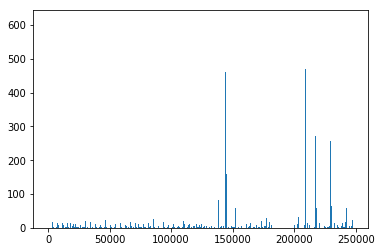

In [19]:
plt.hist(df['HwidCell'].values, bins=2500)

Access all the root objects stored in the file.

In [4]:
file.keys()

[b'myTree;1']

There appears to be a single TTree.

In [5]:
tree = file['myTree']

The labels of the tree. We need to convert to String because they are stored by default in bytes.

In [6]:
LABELS_bytes = tree.keys()
LABELS = [label.decode("utf-8") for label in LABELS_bytes]
print(LABELS)

['RunNumber', 'LBNumber', 'EventNumber', 'BCID', 'LArError', 'ncells', 'ECell', 'TCell', 'EtaCell', 'PhiCell', 'LayerCell', 'ProvCell', 'QuaCell', 'GainCell', 'HwidCell', 'ADC']


Open up the arrays.

In [7]:
ARRAYS = [tree[label].array() for label in LABELS]

Create a dictionary that will be used to create a DataFrame.

In [8]:
DICT = dict(zip(LABELS, ARRAYS))

Create the DataFrame. This is a convenient way of viewing the data.

In [169]:
def construct_df(file):
    tree = file['myTree']
    LABELS_bytes = tree.keys()
    LABELS = [label.decode("utf-8") for label in LABELS_bytes]
    ARRAYS = [tree[label].array() for label in LABELS]
    DICT = dict(zip(LABELS, ARRAYS))
    df = pd.DataFrame.from_dict(DICT)
    df = df[df.ncells != 0]
    
    return pd.DataFrame({'RunNumber':df.RunNumber.repeat(df.ncells),
                         'LBNumber':df.LBNumber.repeat(df.ncells),
                         'EventNumber':df.LBNumber.repeat(df.ncells),
                         'BCID':df.LBNumber.repeat(df.ncells),
                         'LArError':df.LBNumber.repeat(df.ncells),
                         'ncells':df.LBNumber.repeat(df.ncells),
                         'ECell':np.concatenate(df.ECell.values),
                         'TCell':np.concatenate(df.TCell.values),
                         'EtaCell':np.concatenate(df.EtaCell.values),
                         'PhiCell':np.concatenate(df.PhiCell.values),
                         'LayerCell':np.concatenate(df.LayerCell.values),
                         'ProvCell':np.concatenate(df.ProvCell.values),
                         'QuaCell':np.concatenate(df.QuaCell.values),
                         'GainCell':np.concatenate(df.GainCell.values),
                         'HwidCell':np.concatenate(df.HwidCell.values),
                         'ADC':list(np.concatenate(ARRAYS[-1]))})

In [170]:
DF = construct_df(file)
display(DF.head())

,RunNumber,LBNumber,EventNumber,BCID,LArError,ncells,ECell,TCell,EtaCell,PhiCell,LayerCell,ProvCell,QuaCell,GainCell,HwidCell,ADC
0,347848,354,354,354,354,354,2613.530518,-21.323975,0.312799,1.126362,1,8613,5319,0,76259,"[3, -1, 8, -8, 422, 1245, 996, 426, 155, 5, -1..."
0,347848,354,354,354,354,354,3139.299316,-22.093777,0.314150,1.113595,2,8613,62,0,77297,"[-7, 0, 1, 9, 174, 351, 272, 184, 97, 24, -18,..."
0,347848,354,354,354,354,354,5900.525879,-21.593811,0.314148,1.138221,2,8613,83,0,77298,"[1, 6, 3, -1, 319, 664, 518, 337, 179, 48, -40..."
1,347848,354,354,354,354,354,3256.995117,-22.066118,-0.537126,1.980469,2,8613,292,0,11863,"[0, -8, -5, 0, 156, 367, 294, 198, 94, 25, -21..."
1,347848,354,354,354,354,354,16505.000000,-21.179974,3.007628,-3.048756,8,8613,28,1,230576,"[-4, -1, 4, 44, 147, 116, 56, 10, -8, -18, -19..."


Note a few things:

<ul>
  <li> The run number probably refers to the LHC run. </li>
  <li> The LB Number has to do with time lag. </li>
  <li> The number of cells seems to correspond with the array lengths of all the cell IDs and the number of ADC pulses stored. This (most likely) has to do with where the pulses were obtained and the electric signals measured at these locations.</li>
</ul>



# Operations on DataFrame

# Plotting

A little plotting macro to explore the rows of this DataFrame.

In [10]:
def plotter(i):
    arrs = DF.iloc[i]['ADC']
    EventNumber = str(DF.iloc[i]['EventNumber'])
    LBNumber = str(DF.iloc[i]['LBNumber']) #because we'll display on plot
    x_var= np.arange(0, len(arrs[0]), 1)

    fig, ax = plt.subplots(1,1, figsize=(8,5))
    [ax.plot(arr, label='Cell {}'.format(i)) for (i,arr) in enumerate(arrs)]
    [ax.scatter(x_var, arr) for arr in arrs]
    ax.set_title('Event Number = {}'.format(EventNumber), fontsize=24)
    
    ax.text(0.55, 0.55, 'LBNumber = ' + LBNumber, fontsize=22,
        transform=ax.transAxes, verticalalignment='top')
    ax.grid()
    ax.legend()
    plt.show()

Here are some simple plots. Note that each cell has its own specific ID (cell 0 on one plot =/= cell 0 on another plot: they may have completely different ID values).

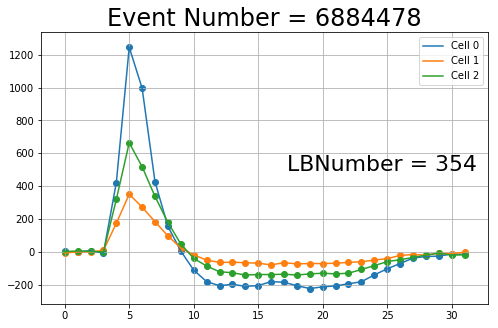

In [11]:
plotter(0)

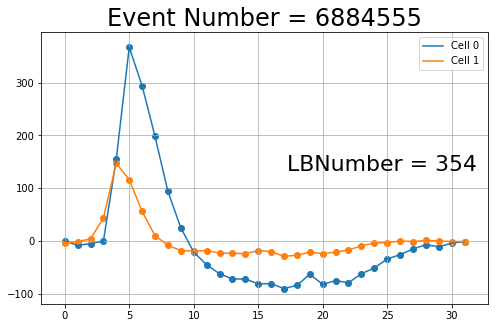

In [12]:
plotter(1)

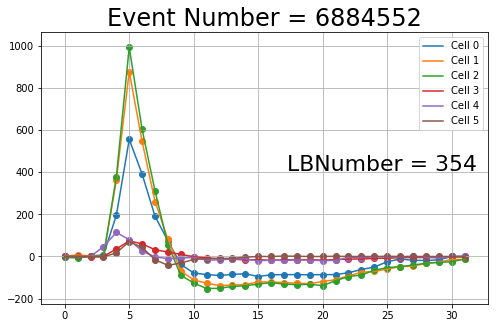

In [13]:
plotter(2)